In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

In [43]:
%matplotlib inline

# Network Analysis

In [5]:
import osmnx as ox
import networkx as nx
from IPython.display import IFrame # loads HTML files
import folium
import pandana as pnda
from pandana.loaders import osm

In [6]:
import carto2gpd

In [7]:
pd.set_option('display.max_columns', 999)

In [8]:
plt.rcParams['figure.figsize'] = (10,6)

### get neighborhood data

In [10]:
hoods = gpd.read_file("https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON")

In [11]:
hoods.head()

ntacode     shape_area county_fips         ntaname     shape_leng  \
0    BK88  54005018.7472         047    Borough Park  39247.2280737   
1    QN51   52488276.477         081     Murray Hill   33266.904811   
2    QN27    19726845.26         081   East Elmhurst  19816.7115378   
3    QN07  22887772.7683         081          Hollis  20976.3358374   
4    MN06  10647077.6122         061  Manhattanville  17040.6865482   

   boro_name boro_code                                           geometry  
0   Brooklyn         3  (POLYGON ((-73.97604935657381 40.6312759056467...  
1     Queens         4  (POLYGON ((-73.80379022888246 40.7756101117924...  
2     Queens         4  (POLYGON ((-73.86109724401859 40.7636644770877...  
3     Queens         4  (POLYGON ((-73.75725671509139 40.7181386016625...  
4  Manhattan         1  (POLYGON ((-73.94607828608069 40.8212632160616...

In [12]:
br_qu = hoods.loc[hoods['boro_name'].isin(['Brooklyn','Queens'])]

In [13]:
br_qu.crs

{'init': 'epsg:4326'}

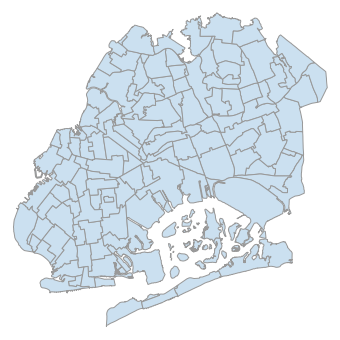

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11aa755f860>)

In [133]:
ox.plot_shape(br_qu.to_crs(epsg=3857))

In [14]:
union = br_qu.geometry.unary_union

In [15]:
union

In [16]:
boundary = union.bounds
boundary

(-74.04189643176389, 40.54183395995044, -73.70000906254971, 40.80101146781899)

In [17]:
[lng_min, lat_min, lng_max, lat_max] = boundary

In [38]:
G_Queens = ox.graph_from_polygon(Queens_u, network_type='walk')

In [140]:
G_union = ox.graph_from_polygon(union, network_type = 'walk')

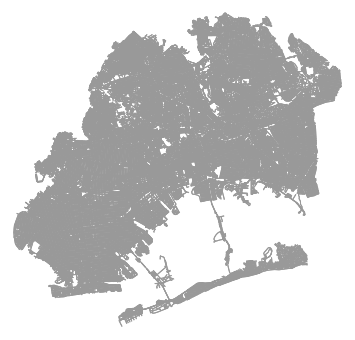

(<Figure size 440.113x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a3bd75cf8>)

In [141]:
ox.plot_graph(ox.project_graph(G_union), node_size=0)

### get amenities from OSM

In [18]:
# query OSM
fastf = osm.node_query(lat_min, lng_min, lat_max, lng_max, tags='amenity=fast_food')
convenience = osm.node_query(lat_min, lng_min, lat_max, lng_max, tags='shop=convenience')
market = osm.node_query(lat_min, lng_min, lat_max, lng_max, tags='amenity=marketplace')
superm = osm.node_query(lat_min, lng_min, lat_max, lng_max, tags='shop=supermarket')

In [19]:
fastf.head()

lat        lon addr:city addr:housenumber addr:postcode  \
id                                                                         
349323821  40.762536 -73.976697  New York               43         10019   
368047348  40.762222 -73.868889       NaN              NaN           NaN   
502803968  40.739462 -73.815374       NaN              NaN           NaN   
580418725  40.790320 -73.974631  New York             2424         10024   
584120700  40.745898 -73.986688       NaN                1         10016   

                addr:street    amenity   branch           brand  \
id                                                                
349323821  West 55th Street  fast_food  55th St       Five Guys   
368047348               NaN  fast_food      NaN  Dunkin' Donuts   
502803968               NaN  fast_food      NaN             NaN   
580418725          Broadway  fast_food      NaN  Dunkin' Donuts   
584120700        5th Avenue  fast_food      NaN             NaN   

          brand:wikidata    brand:wikipedia            cuisine  \
id                                                               
349323821       Q1131810       en:Five Guys             burger   
368047348        Q847743  en:Dunkin' Donuts       donut;coffee   
502803968            NaN                NaN                NaN   
580418725        Q847743  en:Dunkin' Donuts  donut;coffee_shop   
584120700            NaN                NaN                NaN   

                       name                official_name      opening_hours  \
id                                                                            
349323821         Five Guys  Five Guys Burgers and Fries  Mo-Su 11:00-22:00   
368047348    Dunkin' Donuts                          NaN                NaN   
502803968    Dunkin' Donuts                          NaN                NaN   
580418725    Dunkin' Donuts                          NaN  Mo-Su 05:00-24:00   
584120700  Café au bon gout                          NaN                NaN   

                     phone takeaway  \
id                                    
349323821  +1 212-459-9600      yes   
368047348              NaN      yes   
502803968              NaN      NaN   
580418725              NaN      yes   
584120700              NaN      NaN   

                                                     website addr:state  ele  \
id                                                                             
349323821  https://fiveguys.olo.express/menu/nyc-55th-st/...        NaN  NaN   
368047348                                                NaN         NY   18   
502803968                                                NaN        NaN  NaN   
580418725                                                NaN         NY  NaN   
584120700                                                NaN        NaN  NaN   

          gnis:county_name gnis:feature_id  \
id                                           
349323821              NaN             NaN   
368047348           Queens         2079685   
502803968              NaN             NaN   
580418725              NaN             NaN   
584120700              NaN             NaN   

                               gnis:import_uuid gnis:reviewed addr:country  \
id                                                                           
349323821                                   NaN           NaN          NaN   
368047348  57871b70-0100-4405-bb30-88b2e001a944            no          NaN   
502803968                                   NaN           NaN          NaN   
580418725                                   NaN           NaN           US   
584120700                                   NaN           NaN          NaN   

          internet_access payment:cash payment:credit_cards drive_through  \
id                                                                          
349323821             NaN          NaN                  NaN           NaN   
368047348             NaN          NaN                  NaN  

In [21]:
convenience.head()

lat        lon  atm             cuisine drink:beer  \
id                                                                    
357625435  40.651682 -73.975512  yes            sandwich        yes   
409771708  40.793566 -73.970987  NaN                 NaN        NaN   
419361344  40.686773 -73.990279  NaN                 NaN        yes   
419361920  40.687644 -73.966593  yes  sandwich;breakfast        yes   
617378672  40.714653 -73.944212  NaN                 NaN        NaN   

          drink:coffee                        name            phone  \
id                                                                    
357625435          yes                 New Blondie  +1-717-686-1003   
409771708          NaN                     95 Deli  +1 212 663 3300   
419361344          NaN  Mom & Pop's Organic Market              NaN   
419361920          NaN        Waverly Candy & Deli  +1-347-223-4997   
617378672          NaN                         NaN              NaN   

                  shop addr:city addr:country addr:housenumber addr:postcode  \
id                                                                             
357625435  convenience       NaN          NaN              NaN           NaN   
409771708  convenience  New York           US              720         10025   
419361344  convenience       NaN          NaN              147         11201   
419361920  convenience       NaN          NaN              NaN           NaN   
617378672  convenience       NaN          NaN              NaN           NaN   

          addr:state       addr:street tobacco opening_hours wheelchair brand  \
id                                                                              
357625435        NaN               NaN     NaN           NaN        NaN   NaN   
409771708         NY  Amsterdam Avenue     NaN           NaN        NaN   NaN   
419361344        NaN      Smith Street     yes           NaN        NaN   NaN   
419361920        NaN               NaN     NaN           NaN        NaN   NaN   
617378672        NaN               NaN     NaN           NaN        NaN   NaN   

          brand:wikidata brand:wikipedia delivery drink:juice drink:smoothie  \
id                                                                             
357625435            NaN             NaN      NaN         NaN            NaN   
409771708            NaN             NaN      NaN         NaN            NaN   
419361344            NaN             NaN      NaN         NaN            NaN   
419361920            NaN             NaN      NaN         NaN            NaN   
617378672            NaN             NaN      NaN         NaN            NaN   

          alcohol alt_name website diet:kosher drink:tea drink:wine capacity  \
id                                                                             
357625435     NaN      NaN     NaN         NaN       NaN        NaN      NaN   
409771708     NaN      NaN     NaN         NaN       NaN        NaN      NaN   
419361344     NaN      NaN     NaN         NaN       NaN        NaN      NaN   
419361920     NaN      NaN     NaN         NaN       NaN        NaN      NaN   
617378672     NaN      NaN     NaN         NaN       NaN        NaN      NaN   

          takeaway diet:gluten_free diet:organic diet:vegan diet:vegetarian  \
id                                                                            
357625435      NaN              NaN          NaN        NaN             NaN   
409771708      NaN              NaN          NaN        NaN             NaN   
419361344      NaN              NaN          NaN        NaN             NaN   
419361920      NaN              NaN          NaN        NaN             NaN   
617378672      NaN              NaN          NaN        NaN             NaN   

           fax old_name amenity toilets diet:halal level lottery addr:unit  \
id                                                                           
357625435  NaN      NaN     NaN     NaN        NaN   NaN    

In [22]:
market['shop']='NaN'

In [23]:
market.head()

lat        lon      amenity branch  \
id                                                     
552255010   40.702768 -73.987742  marketplace  Dumbo   
1003286805  40.736663 -73.989670  marketplace    NaN   
2277315366  40.719717 -73.952612  marketplace    NaN   
2321125648  40.697650 -73.993419  marketplace    NaN   
2553613117  40.608565 -73.958382  marketplace    NaN   

                                              name              opening_hours  \
id                                                                              
552255010                            Brooklyn Flea             Su 10:00-18:00   
1003286805               Union Square Green Market  Mo, We, Fr-Sa 08:00-18:00   
2277315366  Greenpoint / McCarren Park Greenmarket              Sa 8:00-15:00   
2321125648                            Han's Market                        NaN   
2553613117           Kings Convenience Corporation                        NaN   

                                                      website  \
id                                                              
552255010              https://brooklynflea.com/markets/dumbo   
1003286805                                                NaN   
2277315366  https://www.grownyc.org/greenmarket/brooklyn/g...   
2321125648                                                NaN   
2553613117                                                NaN   

           addr:housenumber addr:postcode        addr:street       operator  \
id                                                                            
552255010               NaN           NaN                NaN            NaN   
1003286805                1         10003  Union Square West  Local farmers   
2277315366              NaN           NaN                NaN  Local Farmers   
2321125648               51           NaN       Clark Street            NaN   
2553613117             1426         11229      Kings Highway            NaN   

            wikidata                    wikipedia addr:city addr:state note  \
id                                                                            
552255010        NaN                          NaN       NaN        NaN  NaN   
1003286805  Q7886047  en:Union Square Greenmarket       NaN        NaN  NaN   
2277315366       NaN                          NaN       NaN        NaN  NaN   
2321125648       NaN                          NaN       NaN        NaN  NaN   
2553613117       NaN                          NaN  Brooklyn         NY  NaN   

           seasonal xmas:feature xmas:location contact:website name:en  \
id                                                                       
552255010       NaN          NaN           NaN             NaN     NaN   
1003286805      NaN          NaN           NaN             NaN     NaN   
2277315366      NaN          NaN           NaN             NaN     NaN   
2321125648      NaN          NaN           NaN             NaN     NaN   
2553613117      NaN          NaN           NaN             NaN     NaN   

           description phone contact:facebook email payment:cash  \
id                                                                 
552255010          NaN   NaN              NaN   NaN          NaN   
1003286805         NaN   NaN              NaN   NaN          NaN   
2277315366         NaN   NaN              NaN   NaN          NaN   
2321125648         NaN   NaN              NaN   NaN          NaN   
2553613117         NaN   NaN              NaN   NaN          NaN   

           payment:credit_cards payment:debit_cards payment:ebt payment:sfmnp  \
id                                                                              
552255010                   NaN                 NaN         NaN           NaN   
1003286805                  NaN                 NaN         NaN           NaN   
2277315366                  NaN                 NaN         NaN           NaN   
2321125648                  NaN                 NaN         NaN           NaN   
2553613117 

In [24]:
superm.head()

lat        lon addr:city addr:housenumber        addr:street  \
id                                                                              
297456592  40.743284 -74.039448   Hoboken              401         Jackson St   
419360013  40.687037 -73.966457       NaN              NaN                NaN   
502791662  40.743429 -73.825348       NaN            59-11        Main Street   
568230825  40.728420 -73.814114       NaN            72-15  Kissena Boulevard   
568230943  40.733308 -73.804512       NaN              NaN                NaN   

                           name         shop drink:beer  \
id                                                        
297456592            Big Banner  supermarket        NaN   
419360013  Waverly Urban Market  supermarket        yes   
502791662               Yong Fa  supermarket        NaN   
568230825  Aron's Kissena Farms  supermarket        NaN   
568230943               Keyfood  supermarket        NaN   

                               opening_hours name:zh addr:postcode branch  \
id                                                                          
297456592                                NaN     NaN           NaN    NaN   
419360013  Mo-Sa 07:00-21:00; Su 08:00-21:00     NaN           NaN    NaN   
502791662                                NaN   新中美超市           NaN    NaN   
568230825                                NaN     NaN         11367    NaN   
568230943                                NaN     NaN           NaN    NaN   

          brand brand:wikidata brand:wikipedia organic phone website  \
id                                                                     
297456592   NaN            NaN             NaN     NaN   NaN     NaN   
419360013   NaN            NaN             NaN     NaN   NaN     NaN   
502791662   NaN            NaN             NaN     NaN   NaN     NaN   
568230825   NaN            NaN             NaN     NaN   NaN     NaN   
568230943   NaN            NaN             NaN     NaN   NaN     NaN   

          addr:state payment:cash payment:credit_cards  url wheelchair  \
id                                                                       
297456592        NaN          NaN                  NaN  NaN        NaN   
419360013        NaN          NaN                  NaN  NaN        NaN   
502791662        NaN          NaN                  NaN  NaN        NaN   
568230825        NaN          NaN                  NaN  NaN        NaN   
568230943        NaN          NaN                  NaN  NaN        NaN   

          operator  ref addr:country toilets:wheelchair  \
id                                                        
297456592      NaN  NaN          NaN                NaN   
419360013      NaN  NaN          NaN                NaN   
502791662      NaN  NaN          NaN                NaN   
568230825      NaN  NaN          NaN                NaN   
568230943      NaN  NaN          NaN                NaN   

          wheelchair:description wikidata wikipedia currency:USD postal_code  \
id                                                                             
297456592                    NaN      NaN       NaN          NaN         NaN   
419360013                    NaN      NaN       NaN          NaN         NaN   
502791662                    NaN      NaN       NaN          NaN         NaN   
568230825                    NaN      NaN       NaN          NaN         NaN   
568230943                    NaN      NaN       NaN          NaN         NaN   

           atm drink:wine cuisine delivery drink:coffee takeaway name:en  fax  \
id                                                                              
297456592  NaN        NaN     NaN      NaN          NaN      NaN     NaN  NaN   
419360013  NaN        NaN     NaN      NaN          NaN      NaN     NaN  NaN   
502791662  NaN        NaN     NaN      NaN          NaN      NaN     NaN  NaN   
568230825  NaN        NaN     NaN      NaN          NaN      NaN     NaN  NaN   
568230943 

In [27]:
poi_df = fastf[['lat', 'lon', 'amenity','shop']].reset_index()

In [28]:
otheramenities = convenience, market, superm
for x in otheramenities:
    x_ = x[['lat', 'lon', 'amenity','shop']].reset_index()
    poi_df = poi_df.append(x_)

In [30]:
poi_df

id        lat        lon    amenity         shop
0     349323821  40.762536 -73.976697  fast_food          NaN
1     368047348  40.762222 -73.868889  fast_food          NaN
2     502803968  40.739462 -73.815374  fast_food          NaN
3     580418725  40.790320 -73.974631  fast_food          NaN
4     584120700  40.745898 -73.986688  fast_food          NaN
..          ...        ...        ...        ...          ...
514  6939934108  40.718079 -73.994794        NaN  supermarket
515  6943787237  40.667549 -73.958943        NaN  supermarket
516  6979654856  40.639211 -73.701723        NaN  supermarket
517  7003295419  40.679529 -73.755392        NaN  supermarket
518  7041755299  40.771797 -73.958883        NaN  supermarket

[3124 rows x 5 columns]

In [31]:
len(poi_df)

3124

In [32]:
poi_df = poi_df.replace(np.nan, 'NaN', regex=True)

In [33]:
poi_df.amenity[poi_df.amenity == "NaN"] = poi_df.shop

C:\Users\HanyongXu\Anaconda3\envs\musa-620\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
poi_df

id        lat        lon      amenity         shop
0     349323821  40.762536 -73.976697    fast_food          NaN
1     368047348  40.762222 -73.868889    fast_food          NaN
2     502803968  40.739462 -73.815374    fast_food          NaN
3     580418725  40.790320 -73.974631    fast_food          NaN
4     584120700  40.745898 -73.986688    fast_food          NaN
..          ...        ...        ...          ...          ...
514  6939934108  40.718079 -73.994794  supermarket  supermarket
515  6943787237  40.667549 -73.958943  supermarket  supermarket
516  6979654856  40.639211 -73.701723  supermarket  supermarket
517  7003295419  40.679529 -73.755392  supermarket  supermarket
518  7041755299  40.771797 -73.958883  supermarket  supermarket

[3124 rows x 5 columns]

### get network data and merge everything together

In [35]:
net = osm.pdna_network_from_bbox(
    lat_min, lng_min, lat_max, lng_max, network_type="walk"
)

Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](40.54183396,-74.04189643,40.80101147,-73.70000906);>;);out;'}"
Downloaded 55,962.6KB from www.overpass-api.de in 6.86 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 7.94 seconds
Returning OSM data with 307,891 nodes and 88,584 ways...
Edge node pairs completed. Took 126.70 seconds
Returning processed graph with 120,809 nodes and 187,039 edges...
Completed OSM data download and Pandana node and edge table creation in 139.31 seconds


In [39]:
def to_geopandas(df, xcol='x', ycol='y'):
    """
    Utility function to convert from DataFrame to GeoDataFrame
    """
    from shapely.geometry import Point
    
    df['geometry'] = df.apply(lambda row: Point(row[xcol], row[ycol]), axis=1)
    return gpd.GeoDataFrame(df, geometry='geometry', crs={'init':'epsg:4326'})

In [36]:
# keyword arguments to pass for the matplotlib figure
bbox_aspect_ratio = (lat_max - lat_min) / (lng_max - lng_min)
fig_kwargs = {"facecolor": "w", "figsize": (10, 10 * bbox_aspect_ratio)}

# keyword arguments to pass for scatter plots
plot_kwargs = {"s": 1, "alpha": 0.8, "cmap": "summer_r", "edgecolor": "none"}

In [37]:
def plot_walking_distance(net, amenity, distance=5000, n=1):
    """
    Plot the walking distance to the specified amenity
    """
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    # subset of POI
    poi_subset = poi_df[poi_df['amenity']==amenity]
    
    #for x in amenities:
    net.set_pois(amenity, 5000, 5, poi_subset["lon"], poi_subset["lat"])
    
    # get the distances to nearest num_pois POI
    access = net.nearest_pois(distance=5000, category=amenity, num_pois=5)

    # merge node positions and distances to nearest PO
    nodes = pd.merge(net.nodes_df, access, left_index=True, right_index=True)    
    nodes = to_geopandas(nodes)
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(10,10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    # plot the distance to the nth nearest amenity
    ax = nodes.plot(ax=ax, cax=cax, column=nodes[n], legend=True, **plot_kwargs)
    
    # add the amenities as stars
    for i, row in poi_subset.iterrows():
        ax.scatter(row['lon'], row['lat'], color='white', s=1, marker='o')
    
    # format
    ax.set_facecolor('black')
    ax.figure.set_size_inches(fig_kwargs['figsize'])
    
    # set extent
    [xmin, ymin, xmax, ymax] = nodes.geometry.total_bounds
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    return ax, nodes

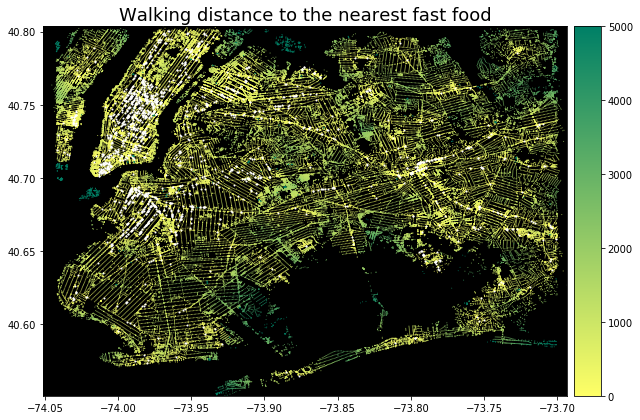

In [44]:
ax, node1 = plot_walking_distance(net, "fast_food", n=1)
ax.set_title("Walking distance to the nearest fast food", fontsize=18);

In [46]:
node1=node1.reset_index()
node1

id          x          y            1            2  \
0         30807308 -73.962176  40.792024   463.039001   534.862976   
1         30807309 -73.962407  40.791687   476.906006   490.960999   
2         30807310 -73.962498  40.791550   473.923004   493.944000   
3         30807314 -73.963578  40.790724   416.079987   483.605011   
4         30807336 -73.964181  40.788475   687.552002   714.736023   
...            ...        ...        ...          ...          ...   
120804  7040709750 -73.905236  40.784876  1307.186035  1358.004028   
120805  7040709752 -73.906490  40.783887  1154.668945  1205.487061   
120806  7040912577 -73.962848  40.665274   354.026001   364.442993   
120807  7041042087 -73.960417  40.663884    94.693001   181.492996   
120808  7041713705 -73.954835  40.780523   217.434998   217.434998   

                  3            4            5  \
0        590.109009   615.026001   625.583008   
1        571.124023   581.681030   603.976013   
2        554.085999   564.643005   621.013977   
3        494.161987   611.297974   706.612000   
4        755.077026   765.633972   882.770020   
...             ...          ...          ...   
120804  1505.407959  1505.407959  1505.407959   
120805  1352.890991  1352.890991  1352.890991   
120806   381.152008   424.907013   516.138977   
120807   244.854996   283.654999   336.166992   
120808   274.302002   283.807007   283.807007   

                                     geometry  
0              POINT (-73.9621757 40.7920236)  
1               POINT (-73.962407 40.7916869)  
2         POINT (-73.96249779999999 40.79155)  
3              POINT (-73.9635782 40.7907244)  
4              POINT (-73.9641811 40.7884753)  
...                                       ...  
120804  POINT (-73.90523640000001 40.7848764)  
120805         POINT (-73.9064896 40.7838865)  
120806          POINT (-73.9628483 40.665274)  
120807         POINT (-73.9604171 40.6638838)  
120808         POINT (-73.9548346 40.7805232)  

[120809 rows x 9 columns]

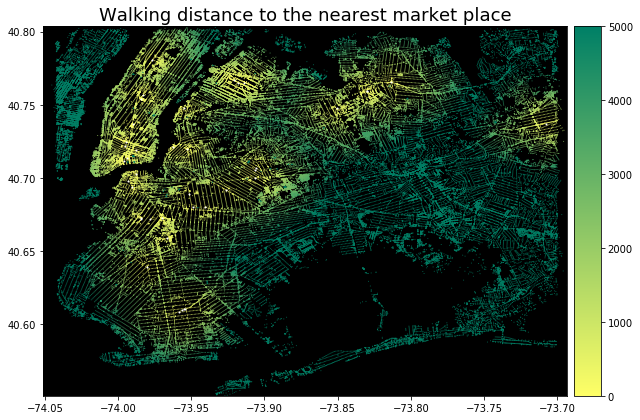

In [45]:
ax, node2 = plot_walking_distance(net, "marketplace", n=1)
ax.set_title("Walking distance to the nearest market place", fontsize=18);

In [47]:
node2=node2.reset_index()
node2

id          x          y            1            2  \
0         30807308 -73.962176  40.792024  2015.677979  4624.346191   
1         30807309 -73.962407  40.791687  1970.670044  4579.337891   
2         30807310 -73.962498  40.791550  1953.631958  4562.299805   
3         30807314 -73.963578  40.790724  1832.334961  4441.002930   
4         30807336 -73.964181  40.788475  1632.854980  4211.426758   
...            ...        ...        ...          ...          ...   
120804  7040709750 -73.905236  40.784876  2686.749023  2811.375977   
120805  7040709752 -73.906490  40.783887  2534.231934  2658.858887   
120806  7040912577 -73.962848  40.665274   977.206970  1146.683960   
120807  7041042087 -73.960417  40.663884   922.161987  1484.015991   
120808  7041713705 -73.954835  40.780523  2329.691895  4184.290039   

                  3            4            5  \
0       4979.435059  5000.000000  5000.000000   
1       4934.426758  5000.000000  5000.000000   
2       4917.389160  5000.000000  5000.000000   
3       4796.091797  5000.000000  5000.000000   
4       4571.346191  5000.000000  5000.000000   
...             ...          ...          ...   
120804  2857.267090  5000.000000  5000.000000   
120805  2704.750000  5000.000000  5000.000000   
120806  1945.192993  2380.831055  2398.159912   
120807  2131.571045  2389.779053  2524.566895   
120808  4496.985840  5000.000000  5000.000000   

                                     geometry  
0              POINT (-73.9621757 40.7920236)  
1               POINT (-73.962407 40.7916869)  
2         POINT (-73.96249779999999 40.79155)  
3              POINT (-73.9635782 40.7907244)  
4              POINT (-73.9641811 40.7884753)  
...                                       ...  
120804  POINT (-73.90523640000001 40.7848764)  
120805         POINT (-73.9064896 40.7838865)  
120806          POINT (-73.9628483 40.665274)  
120807         POINT (-73.9604171 40.6638838)  
120808         POINT (-73.9548346 40.7805232)  

[120809 rows x 9 columns]

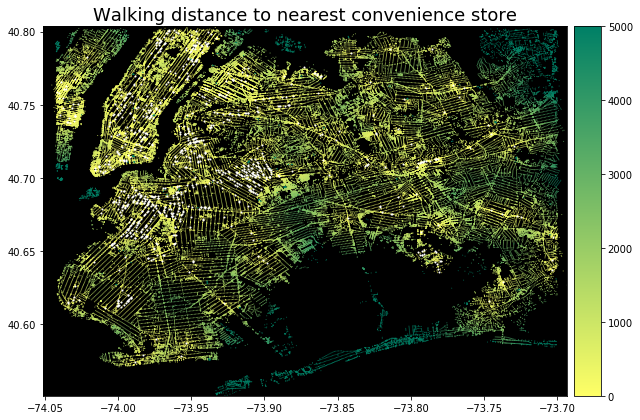

In [50]:
ax, node3 = plot_walking_distance(net, "convenience", n=1)
ax.set_title("Walking distance to nearest convenience store", fontsize=18);

In [51]:
node3=node3.reset_index()

In [52]:
node3

id          x          y            1            2  \
0         30807308 -73.962176  40.792024   463.039001   615.026001   
1         30807309 -73.962407  40.791687   476.906006   571.124023   
2         30807310 -73.962498  40.791550   493.944000   554.085999   
3         30807314 -73.963578  40.790724   483.605011   494.161987   
4         30807336 -73.964181  40.788475   668.963989   668.963989   
...            ...        ...        ...          ...          ...   
120804  7040709750 -73.905236  40.784876  1601.848999  1681.350952   
120805  7040709752 -73.906490  40.783887  1449.332031  1528.833984   
120806  7040912577 -73.962848  40.665274   542.802979   551.840027   
120807  7041042087 -73.960417  40.663884   336.166992   360.239014   
120808  7041713705 -73.954835  40.780523   269.240997   371.847992   

                  3            4            5  \
0        625.583008   693.984009   707.267029   
1        581.681030   650.081970   721.133972   
2        564.643005   633.044006   738.171997   
3        562.562988   611.297974   773.515015   
4        683.463013   755.077026   765.633972   
...             ...          ...          ...   
120804  1890.130005  2166.788086  2436.948975   
120805  1737.613037  2014.270996  2284.431885   
120806   581.999023   738.664001   844.197998   
120807   361.110992   502.618988   757.452026   
120808   415.191010   564.278015   572.554016   

                                     geometry  
0              POINT (-73.9621757 40.7920236)  
1               POINT (-73.962407 40.7916869)  
2         POINT (-73.96249779999999 40.79155)  
3              POINT (-73.9635782 40.7907244)  
4              POINT (-73.9641811 40.7884753)  
...                                       ...  
120804  POINT (-73.90523640000001 40.7848764)  
120805         POINT (-73.9064896 40.7838865)  
120806          POINT (-73.9628483 40.665274)  
120807         POINT (-73.9604171 40.6638838)  
120808         POINT (-73.9548346 40.7805232)  

[120809 rows x 9 columns]

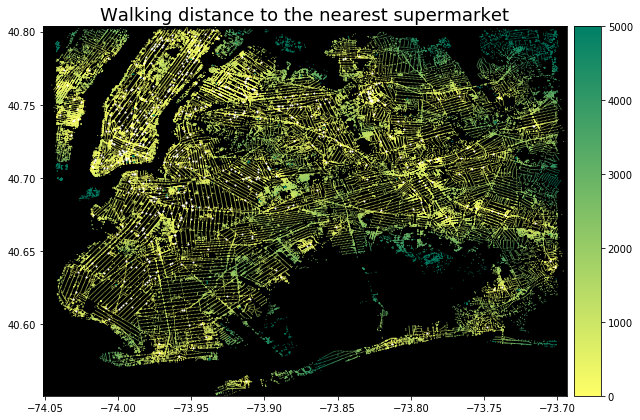

In [53]:
ax, node4 = plot_walking_distance(net, "supermarket", n=1)
ax.set_title("Walking distance to the nearest supermarket", fontsize=18);

In [54]:
node4=node4.reset_index()
node4

id          x          y            1            2  \
0         30807308 -73.962176  40.792024   325.010986   699.565002   
1         30807309 -73.962407  40.791687   338.877991   655.663025   
2         30807310 -73.962498  40.791550   355.915985   638.625000   
3         30807314 -73.963578  40.790724   473.269989   580.781982   
4         30807336 -73.964181  40.788475   602.379028   615.456970   
...            ...        ...        ...          ...          ...   
120804  7040709750 -73.905236  40.784876  1170.875000  1301.349976   
120805  7040709752 -73.906490  40.783887  1018.357971  1148.833008   
120806  7040912577 -73.962848  40.665274   542.802979   542.802979   
120807  7041042087 -73.960417  40.663884   360.239014   360.239014   
120808  7041713705 -73.954835  40.780523   115.036003   188.886993   

                  3            4            5  \
0        784.247986   901.033020   902.393982   
1        740.346008   858.492004   889.679016   
2        723.307983   841.453979   872.640991   
3        642.818970   762.224976   783.611023   
4        744.742004   852.254028   869.770996   
...             ...          ...          ...   
120804  1542.696045  1601.848999  2368.834961   
120805  1390.178955  1449.332031  2216.318115   
120806   821.559021  1138.359985  1231.208008   
120807   477.027008   883.234985   983.676025   
120808   217.434998   353.195007   613.556030   

                                     geometry  
0              POINT (-73.9621757 40.7920236)  
1               POINT (-73.962407 40.7916869)  
2         POINT (-73.96249779999999 40.79155)  
3              POINT (-73.9635782 40.7907244)  
4              POINT (-73.9641811 40.7884753)  
...                                       ...  
120804  POINT (-73.90523640000001 40.7848764)  
120805         POINT (-73.9064896 40.7838865)  
120806          POINT (-73.9628483 40.665274)  
120807         POINT (-73.9604171 40.6638838)  
120808         POINT (-73.9548346 40.7805232)  

[120809 rows x 9 columns]

In [55]:
node1.to_csv(path_or_buf = "fastfood.csv")

In [56]:
node2.to_csv(path_or_buf = "market.csv")

In [57]:
node3.to_csv(path_or_buf = "convenience.csv")

In [58]:
node4.to_csv(path_or_buf = "supermarket.csv")

# Web Scraping the Food List
source: <br>
https://www.halfyourplate.ca/fruits-and-veggies/<br>
https://www.eatthis.com/healthiest-foods-on-planet/<br>
https://www.eatthis.com/unhealthiest-foods-on-planet/<br>
https://en.wikipedia.org/wiki/List_of_snack_foods<br>
https://www.choosemyplate.gov/eathealthy/<br>
https://www.qsrmagazine.com/reports/qsr50-2012-top-50-chart

### Healthy Food

In [89]:
import requests
from bs4 import BeautifulSoup

In [90]:
rsp = requests.get('https://www.halfyourplate.ca/fruits-and-veggies/fruits-a-z/')
soup = BeautifulSoup(rsp.content, 'html.parser')
selector = "body > div.wrapper.interior-wrapper > div.left-column > ul > li >a"
rows = soup.select(selector)
len(rows)

70

In [91]:
healthyfood = []
for row in rows: 
    fruit = row.text
    healthyfood.append(fruit)
healthyfood

['Acerola – West Indian Cherry',
 'Apple',
 'Apricots',
 'Avocado',
 'Banana',
 'Blackberries',
 'Blackcurrant',
 'Blueberries',
 'Breadfruit',
 'Cantaloupe',
 'Carambola',
 'Cherimoya',
 'Cherries',
 'Clementine',
 'Coconut Meat',
 'Cranberries',
 'Custard-Apple',
 'Date Fruit',
 'Durian',
 'Elderberries',
 'Feijoa',
 'Figs',
 'Gooseberries',
 'Grapefruit',
 'Grapes',
 'Guava',
 'Honeydew Melon',
 'Jackfruit',
 'Java-Plum',
 'Jujube Fruit',
 'Kiwifruit',
 'Kumquat',
 'Lemon',
 'Lime',
 'Longan',
 'Loquat',
 'Lychee',
 'Mandarin',
 'Mango',
 'Mangosteen',
 'Mulberries',
 'Nectarine',
 'Olives',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peaches',
 'Pear',
 'Persimmon – Japanese',
 'Pitaya (Dragonfruit)',
 'Pineapple',
 'Pitanga',
 'Plantain',
 'Plums',
 'Pomegranate',
 'Prickly Pear',
 'Prunes',
 'Pummelo',
 'Quince',
 'Raspberries',
 'Rhubarb',
 'Rose-Apple',
 'Sapodilla',
 'Sapote, Mamey',
 'Soursop',
 'Strawberries',
 'Sugar-Apple',
 'Tamarind',
 'Tangerine',
 'Watermelon']

In [92]:
rsp2 = requests.get('https://www.halfyourplate.ca/fruits-and-veggies/veggies-a-z/')
soup2 = BeautifulSoup(rsp2.content, 'html.parser')
selector2 = "body > div.wrapper.interior-wrapper > div.left-column > ul > li > a"
rows2 = soup2.select(selector2)
len(rows2)

75

In [93]:
for row in rows2: 
    veg = row.text
    healthyfood.append(veg)
healthyfood

['Acerola – West Indian Cherry',
 'Apple',
 'Apricots',
 'Avocado',
 'Banana',
 'Blackberries',
 'Blackcurrant',
 'Blueberries',
 'Breadfruit',
 'Cantaloupe',
 'Carambola',
 'Cherimoya',
 'Cherries',
 'Clementine',
 'Coconut Meat',
 'Cranberries',
 'Custard-Apple',
 'Date Fruit',
 'Durian',
 'Elderberries',
 'Feijoa',
 'Figs',
 'Gooseberries',
 'Grapefruit',
 'Grapes',
 'Guava',
 'Honeydew Melon',
 'Jackfruit',
 'Java-Plum',
 'Jujube Fruit',
 'Kiwifruit',
 'Kumquat',
 'Lemon',
 'Lime',
 'Longan',
 'Loquat',
 'Lychee',
 'Mandarin',
 'Mango',
 'Mangosteen',
 'Mulberries',
 'Nectarine',
 'Olives',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peaches',
 'Pear',
 'Persimmon – Japanese',
 'Pitaya (Dragonfruit)',
 'Pineapple',
 'Pitanga',
 'Plantain',
 'Plums',
 'Pomegranate',
 'Prickly Pear',
 'Prunes',
 'Pummelo',
 'Quince',
 'Raspberries',
 'Rhubarb',
 'Rose-Apple',
 'Sapodilla',
 'Sapote, Mamey',
 'Soursop',
 'Strawberries',
 'Sugar-Apple',
 'Tamarind',
 'Tangerine',
 'Watermelon',
 'Amarant

In [95]:
soup4 = BeautifulSoup(requests.get('https://www.eatthis.com/healthiest-foods-on-planet/').content, 'html.parser')
rows4 = soup4.select("body > div.white-wrapper > div.single-post.container-fluid.max-width.main-page-content.post-353084.post.type-post.status-publish.format-standard.has-post-thumbnail.hentry.category-healthy-eating.tag-food-nutrition.tag-healthy-foods.tag-healthy-snacks > div.row.main-area > div.main-content > div.content > div > div > h2")
len(rows4)

111

In [98]:
for row in rows4: 
    food = row.text
    healthyfood.append(food)
healthyfood

['Acerola – West Indian Cherry',
 'Apple',
 'Apricots',
 'Avocado',
 'Banana',
 'Blackberries',
 'Blackcurrant',
 'Blueberries',
 'Breadfruit',
 'Cantaloupe',
 'Carambola',
 'Cherimoya',
 'Cherries',
 'Clementine',
 'Coconut Meat',
 'Cranberries',
 'Custard-Apple',
 'Date Fruit',
 'Durian',
 'Elderberries',
 'Feijoa',
 'Figs',
 'Gooseberries',
 'Grapefruit',
 'Grapes',
 'Guava',
 'Honeydew Melon',
 'Jackfruit',
 'Java-Plum',
 'Jujube Fruit',
 'Kiwifruit',
 'Kumquat',
 'Lemon',
 'Lime',
 'Longan',
 'Loquat',
 'Lychee',
 'Mandarin',
 'Mango',
 'Mangosteen',
 'Mulberries',
 'Nectarine',
 'Olives',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peaches',
 'Pear',
 'Persimmon – Japanese',
 'Pitaya (Dragonfruit)',
 'Pineapple',
 'Pitanga',
 'Plantain',
 'Plums',
 'Pomegranate',
 'Prickly Pear',
 'Prunes',
 'Pummelo',
 'Quince',
 'Raspberries',
 'Rhubarb',
 'Rose-Apple',
 'Sapodilla',
 'Sapote, Mamey',
 'Soursop',
 'Strawberries',
 'Sugar-Apple',
 'Tamarind',
 'Tangerine',
 'Watermelon',
 'Amarant

In [109]:
soup6 = BeautifulSoup(requests.get('https://www.choosemyplate.gov/eathealthy/protein-foods/protein-foods-group-food-gallery').content, 'html.parser')
rows6 = soup6.select("#block-usda-myplatekitchen-theme-content > article > div > table > tbody > tr > td > ul > li")
len(rows6)

87

In [115]:
for row in rows6: 
    food = row.text
    healthyfood.append(food)
healthyfood

['Acerola – West Indian Cherry',
 'Apple',
 'Apricots',
 'Avocado',
 'Banana',
 'Blackberries',
 'Blackcurrant',
 'Blueberries',
 'Breadfruit',
 'Cantaloupe',
 'Carambola',
 'Cherimoya',
 'Cherries',
 'Clementine',
 'Coconut Meat',
 'Cranberries',
 'Custard-Apple',
 'Date Fruit',
 'Durian',
 'Elderberries',
 'Feijoa',
 'Figs',
 'Gooseberries',
 'Grapefruit',
 'Grapes',
 'Guava',
 'Honeydew Melon',
 'Jackfruit',
 'Java-Plum',
 'Jujube Fruit',
 'Kiwifruit',
 'Kumquat',
 'Lemon',
 'Lime',
 'Longan',
 'Loquat',
 'Lychee',
 'Mandarin',
 'Mango',
 'Mangosteen',
 'Mulberries',
 'Nectarine',
 'Olives',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peaches',
 'Pear',
 'Persimmon – Japanese',
 'Pitaya (Dragonfruit)',
 'Pineapple',
 'Pitanga',
 'Plantain',
 'Plums',
 'Pomegranate',
 'Prickly Pear',
 'Prunes',
 'Pummelo',
 'Quince',
 'Raspberries',
 'Rhubarb',
 'Rose-Apple',
 'Sapodilla',
 'Sapote, Mamey',
 'Soursop',
 'Strawberries',
 'Sugar-Apple',
 'Tamarind',
 'Tangerine',
 'Watermelon',
 'Amarant

In [118]:
soup7 = BeautifulSoup(requests.get('https://www.choosemyplate.gov/eathealthy/grains/grains-group-food-gallery').content, 'html.parser')
rows7 = soup7.select("#block-usda-myplatekitchen-theme-content > article > div > table > tbody > tr > td > ul > li")
len(rows7)

59

In [120]:
for row in rows7: 
    food = row.text
    healthyfood.append(food)
healthyfood

['Acerola – West Indian Cherry',
 'Apple',
 'Apricots',
 'Avocado',
 'Banana',
 'Blackberries',
 'Blackcurrant',
 'Blueberries',
 'Breadfruit',
 'Cantaloupe',
 'Carambola',
 'Cherimoya',
 'Cherries',
 'Clementine',
 'Coconut Meat',
 'Cranberries',
 'Custard-Apple',
 'Date Fruit',
 'Durian',
 'Elderberries',
 'Feijoa',
 'Figs',
 'Gooseberries',
 'Grapefruit',
 'Grapes',
 'Guava',
 'Honeydew Melon',
 'Jackfruit',
 'Java-Plum',
 'Jujube Fruit',
 'Kiwifruit',
 'Kumquat',
 'Lemon',
 'Lime',
 'Longan',
 'Loquat',
 'Lychee',
 'Mandarin',
 'Mango',
 'Mangosteen',
 'Mulberries',
 'Nectarine',
 'Olives',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peaches',
 'Pear',
 'Persimmon – Japanese',
 'Pitaya (Dragonfruit)',
 'Pineapple',
 'Pitanga',
 'Plantain',
 'Plums',
 'Pomegranate',
 'Prickly Pear',
 'Prunes',
 'Pummelo',
 'Quince',
 'Raspberries',
 'Rhubarb',
 'Rose-Apple',
 'Sapodilla',
 'Sapote, Mamey',
 'Soursop',
 'Strawberries',
 'Sugar-Apple',
 'Tamarind',
 'Tangerine',
 'Watermelon',
 'Amarant

In [121]:
len(healthyfood)

402

In [128]:
healthy_fix = []
for i in healthyfood: 
    i = i.replace(u'\n\t\t\t\t\xa0', u'')
    i = i.replace(u'*', u'')
    healthy_fix.append(i) 
healthy_fix

['Acerola – West Indian Cherry',
 'Apple',
 'Apricots',
 'Avocado',
 'Banana',
 'Blackberries',
 'Blackcurrant',
 'Blueberries',
 'Breadfruit',
 'Cantaloupe',
 'Carambola',
 'Cherimoya',
 'Cherries',
 'Clementine',
 'Coconut Meat',
 'Cranberries',
 'Custard-Apple',
 'Date Fruit',
 'Durian',
 'Elderberries',
 'Feijoa',
 'Figs',
 'Gooseberries',
 'Grapefruit',
 'Grapes',
 'Guava',
 'Honeydew Melon',
 'Jackfruit',
 'Java-Plum',
 'Jujube Fruit',
 'Kiwifruit',
 'Kumquat',
 'Lemon',
 'Lime',
 'Longan',
 'Loquat',
 'Lychee',
 'Mandarin',
 'Mango',
 'Mangosteen',
 'Mulberries',
 'Nectarine',
 'Olives',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peaches',
 'Pear',
 'Persimmon – Japanese',
 'Pitaya (Dragonfruit)',
 'Pineapple',
 'Pitanga',
 'Plantain',
 'Plums',
 'Pomegranate',
 'Prickly Pear',
 'Prunes',
 'Pummelo',
 'Quince',
 'Raspberries',
 'Rhubarb',
 'Rose-Apple',
 'Sapodilla',
 'Sapote, Mamey',
 'Soursop',
 'Strawberries',
 'Sugar-Apple',
 'Tamarind',
 'Tangerine',
 'Watermelon',
 'Amarant

In [129]:
healthy_unique = [] 
for i in healthy_fix: 
    if i not in healthy_unique: 
        healthy_unique.append(i) 
healthy_unique

['Acerola – West Indian Cherry',
 'Apple',
 'Apricots',
 'Avocado',
 'Banana',
 'Blackberries',
 'Blackcurrant',
 'Blueberries',
 'Breadfruit',
 'Cantaloupe',
 'Carambola',
 'Cherimoya',
 'Cherries',
 'Clementine',
 'Coconut Meat',
 'Cranberries',
 'Custard-Apple',
 'Date Fruit',
 'Durian',
 'Elderberries',
 'Feijoa',
 'Figs',
 'Gooseberries',
 'Grapefruit',
 'Grapes',
 'Guava',
 'Honeydew Melon',
 'Jackfruit',
 'Java-Plum',
 'Jujube Fruit',
 'Kiwifruit',
 'Kumquat',
 'Lemon',
 'Lime',
 'Longan',
 'Loquat',
 'Lychee',
 'Mandarin',
 'Mango',
 'Mangosteen',
 'Mulberries',
 'Nectarine',
 'Olives',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peaches',
 'Pear',
 'Persimmon – Japanese',
 'Pitaya (Dragonfruit)',
 'Pineapple',
 'Pitanga',
 'Plantain',
 'Plums',
 'Pomegranate',
 'Prickly Pear',
 'Prunes',
 'Pummelo',
 'Quince',
 'Raspberries',
 'Rhubarb',
 'Rose-Apple',
 'Sapodilla',
 'Sapote, Mamey',
 'Soursop',
 'Strawberries',
 'Sugar-Apple',
 'Tamarind',
 'Tangerine',
 'Watermelon',
 'Amarant

In [130]:
len(healthy_unique)

379

### Unhealthy Food

In [77]:
rsp3 = requests.get('https://en.wikipedia.org/wiki/List_of_snack_foods')
soup3 = BeautifulSoup(rsp3.content, 'html.parser')
rows3 = soup3.select("#mw-content-text > div > table > tbody > tr > td:nth-child(1) > a")
len(rows3)

176

In [97]:
unhealthyfood = []
for row in rows3: 
    food = row.text
    unhealthyfood.append(food)
unhealthyfood

['Bitterballen',
 'Bonda',
 'Cereal',
 'Cokodok',
 'Cracker nuts',
 'Crêpe',
 'Croquette',
 'Doughnut',
 'Gulha',
 'Khanom buang',
 'Pakora',
 'Pancakes',
 'Parippu Vada',
 'Pazham Pori',
 'Pizza',
 'Poffertjes',
 'Pretzel',
 'Waffle',
 'Brittle',
 'Imli Candy',
 'Bubblegum',
 'Candy',
 'Chocolate',
 'Chocolate bar',
 'Chocolate truffle',
 'Fudge',
 'Geplak',
 'Grass jelly',
 'Marshmallow',
 'Marzipan',
 'Nougat',
 'Panforte',
 'Pudding',
 'Rice Krispie treats',
 "S'mores",
 'Toffee',
 'Turkish delight',
 'Arrowroot',
 'Chocolate chip cookie',
 'Cookie',
 'Ginger snaps',
 'Graham crackers',
 'Oatmeal cookie',
 'Peanut butter cookie',
 'Gansito',
 'Jaffa Cakes',
 'Snack cake',
 'Churros',
 'Fairy bread',
 'Fruit bun',
 'Pastry',
 'Scones',
 'pie',
 'Toaster pastry',
 'Amazake',
 'Atole',
 'Coffee',
 'Colada morada',
 'Energy drinks',
 'Red Bull',
 'Monster',
 'Flavored milk',
 'Horchata',
 'Juice',
 'Kefir',
 'Malted milk',
 'Milkshake',
 'Root beer',
 'Root beer float',
 'Sikhye',
 'So

In [87]:
soup5 = BeautifulSoup(requests.get('https://www.eatthis.com/unhealthiest-foods-on-the-planet/').content, 'html.parser')
rows5 = soup5.select("body > div.white-wrapper > div.single-post.container-fluid.max-width.main-page-content.post-352531.post.type-post.status-publish.format-standard.has-post-thumbnail.hentry.category-healthy-eating.tag-foods-to-avoid.tag-unhealthy > div.row.main-area > div.main-content > div.content > div > div > h2")
len(rows5)

101

In [99]:
for row in rows5: 
    food = row.text
    unhealthyfood.append(food)
unhealthyfood

['Bitterballen',
 'Bonda',
 'Cereal',
 'Cokodok',
 'Cracker nuts',
 'Crêpe',
 'Croquette',
 'Doughnut',
 'Gulha',
 'Khanom buang',
 'Pakora',
 'Pancakes',
 'Parippu Vada',
 'Pazham Pori',
 'Pizza',
 'Poffertjes',
 'Pretzel',
 'Waffle',
 'Brittle',
 'Imli Candy',
 'Bubblegum',
 'Candy',
 'Chocolate',
 'Chocolate bar',
 'Chocolate truffle',
 'Fudge',
 'Geplak',
 'Grass jelly',
 'Marshmallow',
 'Marzipan',
 'Nougat',
 'Panforte',
 'Pudding',
 'Rice Krispie treats',
 "S'mores",
 'Toffee',
 'Turkish delight',
 'Arrowroot',
 'Chocolate chip cookie',
 'Cookie',
 'Ginger snaps',
 'Graham crackers',
 'Oatmeal cookie',
 'Peanut butter cookie',
 'Gansito',
 'Jaffa Cakes',
 'Snack cake',
 'Churros',
 'Fairy bread',
 'Fruit bun',
 'Pastry',
 'Scones',
 'pie',
 'Toaster pastry',
 'Amazake',
 'Atole',
 'Coffee',
 'Colada morada',
 'Energy drinks',
 'Red Bull',
 'Monster',
 'Flavored milk',
 'Horchata',
 'Juice',
 'Kefir',
 'Malted milk',
 'Milkshake',
 'Root beer',
 'Root beer float',
 'Sikhye',
 'So

In [100]:
len(unhealthyfood)

277

In [101]:
unhealthy_unique = [] 
for i in unhealthyfood: 
    if i not in unhealthy_unique: 
        unhealthy_unique.append(i) 
unhealthy_unique

['Bitterballen',
 'Bonda',
 'Cereal',
 'Cokodok',
 'Cracker nuts',
 'Crêpe',
 'Croquette',
 'Doughnut',
 'Gulha',
 'Khanom buang',
 'Pakora',
 'Pancakes',
 'Parippu Vada',
 'Pazham Pori',
 'Pizza',
 'Poffertjes',
 'Pretzel',
 'Waffle',
 'Brittle',
 'Imli Candy',
 'Bubblegum',
 'Candy',
 'Chocolate',
 'Chocolate bar',
 'Chocolate truffle',
 'Fudge',
 'Geplak',
 'Grass jelly',
 'Marshmallow',
 'Marzipan',
 'Nougat',
 'Panforte',
 'Pudding',
 'Rice Krispie treats',
 "S'mores",
 'Toffee',
 'Turkish delight',
 'Arrowroot',
 'Chocolate chip cookie',
 'Cookie',
 'Ginger snaps',
 'Graham crackers',
 'Oatmeal cookie',
 'Peanut butter cookie',
 'Gansito',
 'Jaffa Cakes',
 'Snack cake',
 'Churros',
 'Fairy bread',
 'Fruit bun',
 'Pastry',
 'Scones',
 'pie',
 'Toaster pastry',
 'Amazake',
 'Atole',
 'Coffee',
 'Colada morada',
 'Energy drinks',
 'Red Bull',
 'Monster',
 'Flavored milk',
 'Horchata',
 'Juice',
 'Kefir',
 'Malted milk',
 'Milkshake',
 'Root beer',
 'Root beer float',
 'Sikhye',
 'So

In [102]:
len(unhealthy_unique)

272

### Fast Food Restaurants

In [126]:
soup8 = BeautifulSoup(requests.get('https://www.qsrmagazine.com/reports/qsr50-2012-top-50-chart').content, 'html.parser')
rows8 = soup8.select("#sortable-chart > tbody > tr > td.data-chain_name")
len(rows8)

50

In [127]:
fastfood = []
for row in rows8: 
    food = row.text
    fastfood.append(food)
fastfood

['McDonald’s',
 'Subway*',
 'Starbucks*1',
 'Wendy’s*',
 'Burger King*',
 'Taco Bell',
 'Dunkin’ Donuts*',
 'Pizza Hut',
 'KFC',
 'Chick-fil-A',
 'Sonic Drive-In',
 'Domino’s Pizza*',
 'Panera Bread',
 'Arby’s',
 'Jack in the Box',
 'Dairy Queen*',
 'Chipotle Mexican Grill2',
 'Papa John’s',
 'Hardee’s',
 'Popeyes Louisiana Kitchen*',
 'Panda Express',
 'Carl’s Jr.',
 'Little Caesars*',
 'Whataburger',
 'Five Guys Burgers & Fries',
 'Quiznos*',
 'Jimmy John’s*',
 'Church’s Chicken',
 'Zaxby’s',
 'Steak ‘n Shake*',
 'Bojangles’',
 'Culver’s',
 'Papa Murphy’s',
 'Checkers/Rally’s',
 'Long John Silver’s*',
 'White Castle',
 'Del Taco',
 'El Pollo Loco*',
 'Jason’s Deli',
 'Boston Market',
 'Krispy Kreme*',
 'Qdoba Mexican Grill',
 'CiCi’s Pizza',
 'In-N-Out Burger*',
 'Baskin-Robbins*',
 'Tim Hortons',
 'Einstein Bros. Bagels',
 'Captain D’s',
 'Sbarro',
 'Krystal*']

In [131]:
fastfood_fix = []
for i in fastfood: 
    i = i.replace(u'1', u'')
    i = i.replace(u'*', u'')
    i = i.replace(u'2', u'')
    fastfood_fix.append(i) 
fastfood_fix

['McDonald’s',
 'Subway',
 'Starbucks',
 'Wendy’s',
 'Burger King',
 'Taco Bell',
 'Dunkin’ Donuts',
 'Pizza Hut',
 'KFC',
 'Chick-fil-A',
 'Sonic Drive-In',
 'Domino’s Pizza',
 'Panera Bread',
 'Arby’s',
 'Jack in the Box',
 'Dairy Queen',
 'Chipotle Mexican Grill',
 'Papa John’s',
 'Hardee’s',
 'Popeyes Louisiana Kitchen',
 'Panda Express',
 'Carl’s Jr.',
 'Little Caesars',
 'Whataburger',
 'Five Guys Burgers & Fries',
 'Quiznos',
 'Jimmy John’s',
 'Church’s Chicken',
 'Zaxby’s',
 'Steak ‘n Shake',
 'Bojangles’',
 'Culver’s',
 'Papa Murphy’s',
 'Checkers/Rally’s',
 'Long John Silver’s',
 'White Castle',
 'Del Taco',
 'El Pollo Loco',
 'Jason’s Deli',
 'Boston Market',
 'Krispy Kreme',
 'Qdoba Mexican Grill',
 'CiCi’s Pizza',
 'In-N-Out Burger',
 'Baskin-Robbins',
 'Tim Hortons',
 'Einstein Bros. Bagels',
 'Captain D’s',
 'Sbarro',
 'Krystal']